In [18]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.preprocessing import normalize

df = pd.read_csv (r'data\raw\Output_rev2.csv', sep=';', decimal=',')
df = df.apply(pd.to_numeric)
df=(df-df.min())/(df.max()-df.min())
#df
#df.max()
#df.info()
#print(df.iloc[:, 0:5])

Nivel      0.0
Vazao      0.0
Precp1     0.0
Precp2     0.0
Precp3     0.0
Precp4     0.0
Precp5     0.0
Precp6     0.0
Precp7     0.0
Precp8     0.0
Precp9     0.0
Precp10    0.0
Precp11    0.0
Evap1      0.0
Evap2      0.0
Evap3      0.0
Evap4      0.0
Evap5      0.0
Evap6      0.0
Evap7      0.0
Evap8      0.0
Evap9      0.0
Evap10     0.0
Evap11     0.0
rnof1      0.0
rnof2      0.0
rnof3      0.0
rnof4      0.0
rnof5      0.0
rnof6      0.0
rnof7      0.0
rnof8      0.0
rnof9      0.0
rnof10     0.0
rnof11     0.0
Temp1      0.0
Temp2      0.0
Temp3      0.0
Temp4      0.0
Temp5      0.0
Temp6      0.0
Temp7      0.0
Temp8      0.0
Temp9      0.0
Temp10     0.0
Temp11     0.0
dtype: float64

In [9]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:43], df.iloc[:, 44], test_size=0.3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.iloc[:, 0:43], df.iloc[:, 45], test_size=0.3)

In [10]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

#from sklearn.metrics import mean_absolute_percentage_error

#explained_variance_score(y_pred, y_test, multioutput='raw_values')
#max_error(y_pred, y_test)
#mean_absolute_error(y_pred, y_test)
#mean_squared_error(y_pred, y_test)
#mean_squared_log_error(y_pred, y_test)
#mean_absolute_percentage_error(y_pred, y_test)

In [11]:
results = np.zeros(1000)
results2 = np.zeros(1000)
j = 0

for i in np.arange(0.1, 33, 0.5):
    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    temp = mean_squared_error(y_pred, y_test)
    results[j]= temp

    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train2, y_train2)
    y_pred2 = regr.predict(X_test2)
    temp2 = mean_squared_error(y_pred2, y_test2)
    results2[j]= temp2
    
    j = j+1

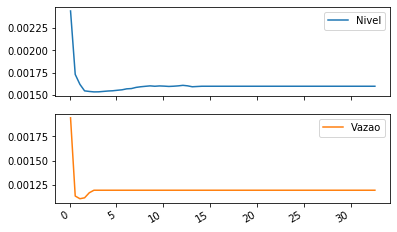

In [12]:
results = results[results != 0]
results2 = results2[results2 != 0]

df = pd.DataFrame({'Nivel': results, 'Vazao': results2}, 
                  index=np.arange(0.1, 33, 0.5))
lines = df.plot.line(subplots=True)


In [13]:
from sklearn.ensemble import RandomForestRegressor

results3 = np.zeros(1000)
results4 = np.zeros(1000)
j = 0

for i in np.arange(1, 100, 5):
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    temp = mean_squared_error(y_pred, y_test2)
    results3[j]= temp
    
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train2, y_train2)
    y_pred2 = regr.predict(X_test)

    temp2 = mean_squared_error(y_pred2, y_test2)
    results4[j]= temp2
    
    j = j+1

C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

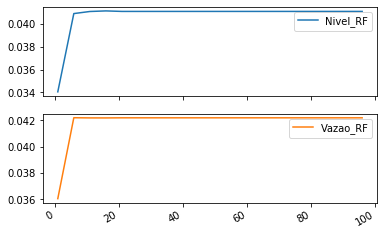

In [14]:
results3 = results3[results3 != 0]
results4 = results4[results4 != 0]

results3

df = pd.DataFrame({'Nivel_RF': results3, 'Vazao_RF': results4}, 
                  index=np.arange(1, 100, 5))
lines = df.plot.line(subplots=True)